# Machine Learning for phone plan recommendation

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model.

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

## Data description

Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:

 - `сalls` — number of calls,
 - `minutes` — total call duration in minutes,
 - `messages` — number of text messages,
 - `mb_used` — Internet traffic used in MB,
 - `is_ultra` — plan for the current month (Ultra - 1, Smart - 0).

## Objectives

The objectives of this project is to:
- Develop a model that would analyze subscribers' behavior
- Build a machine learning model to recommend the right plan based on subscribers' behavior 

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and study the general information</a></li>
        <li><a href="#data_splitting">Split the source data</a></li>
        <li><a href="#investigate_models">Investigate different models quality</a></li>
        <li><a href="#check_quality">Check model quality</a></li>
        <li><a href="#sanity_check">Sanity check the model</a></li>
        <li><a href="#overall_conclusion">Overall conclusion</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and study the general information</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data preprocessing and manipulation, *Scikit-Learn* for building our learning algorithms

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# import train_test_split to split data
from sklearn.model_selection import train_test_split

# import machine learning module from the sklearn library
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.linear_model import LogisticRegression # import logistic regression 
from sklearn.ensemble import RandomForestClassifier # import random forest algorithm
from sklearn.ensemble import AdaBoostClassifier # import adaboost classifier algorithm

# import metrics for sanity check on model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


In [2]:
# read the data
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
except:
    df = pd.read_csv('C:/Users/hotty/Desktop/Practicum by Yandex/Projects/Introduction to Machine Learning/users_behavior.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [3]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe)
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
# study the general information about the dataset 
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

----------------------------------------------------------------------------------------------------
Describe:



,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


----------------------------------------------------------------------------------------------------


<bound method NDFrame.describe of       calls  minutes  messages   mb_used  is_ultra
0      40.0   311.90      83.0  19915.42         0
1      85.0   516.75      56.0  22696.96         0
2      77.0   467.66      86.0  21060.45         0
3     106.0   745.53      81.0   8437.39         1
4      66.0   418.74       1.0  14502.75         0
...     ...      ...       ...       ...       ...
3209  122.0   910.98      20.0  35124.90         1
3210   25.0   190.36       0.0   3275.61         0
3211   97.0   634.44      70.0  13974.06         0
3212   64.0   462.32      90.0  31239.78         0
3213   80.0   566.09       6.0  29480.52         1

[3214 rows x 5 columns]>


Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(3214, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




**Conclusion**

Since the data have already been preprocessed, we see there are no duplicated rows, or missing values as expected. Now that our data is ready for modeling, let's start by splitting the source dataset into a training set, validation set, and test set using a ratio 3:1:1 or 60% training set, 20% validation set, and 20% testing sets.

<div id="data_splitting">
    <h2>Split the source data</h2> 
</div>

To split the data into training set, validation set, and test set we use `sklearn.model_selection.train_test_split` twice. First we split the data into train and test with 20% of split data being the test data. Then we split the 80% train data obtained from the first split into validation and train. 

In [5]:
# split data into training and testing 
df_train, df_test = train_test_split(df, test_size=0.20, random_state=12345)

# split train data into validation and train 
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345) # 0.25 * 0.80 = 0.20 for validation size

In [6]:
# display the shape of the split dataset
print('The train set now contains {}'.format(df_train.shape[0]) + ' dataset representing 60% of the data') 
print('The valid set now contains {}'.format(df_valid.shape[0]) + ' dataset representing 20% of the data')
print('The test set now contains {}'.format(df_test.shape[0]) + ' dataset representing 20% of the data')

The train set now contains 1928 dataset representing 60% of the data
The valid set now contains 643 dataset representing 20% of the data
The test set now contains 643 dataset representing 20% of the data


In [7]:
# declare variables for features and target 
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

print('-'*30)
print('Train features :', features_train.shape)
print('Train target   :',target_train.shape)
print('Valid features :',features_valid.shape)
print('Valid target   :',target_valid.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)

------------------------------
Train features : (1928, 4)
Train target   : (1928,)
Valid features : (643, 4)
Valid target   : (643,)
Test features  : (643, 4)
Test target    : (643,)


**Conclusion**

We have been able to split the data three ways into 60% training set, 20% validation set, and 20% testing sets.

<div id="investigate_models">
    <h2>Investigate different models quality</h2> 
</div>

#### Model development

In this section, we proceed to build and investigate different model. Since this is a classification task, we would use the decision tree classifier, logistic regression, and random forest to develop the model. First we need to investigate different model before deciding on which model to use.

#### Hyperparameter Tuning

##### Decision Tree Classifier

For the decision tree classifier, we iterate over different values and compare the quality of the model by tuning the `max_depth` hyperparameter.

In [8]:
# create the decision tree classifier
def decision_tree_classifier(X_train, y_train, X_valid, y_valid):
    """
    This is a decision tree classifier function developed to train  
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets and plot model 
    accuracy scores on train and validation sets for visual comparison
    """
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define the tree depth
    tree_depth = [i for i in range(1, 21)]
    # create a loop for max_depth from 1 to 21
    for depth in tree_depth:
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # create an instance of a class
        model.fit(X_train, y_train) # train the model
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print('Max depth and accuracy for decision tree classifier')
        print('-'*40)
        print("\033[1m" + 'max_depth = {}'.format(depth) + "\033[0m")
        print('Training set: {:.3f}'.format(accuracy_score(y_train, train_predictions)))
        print('Validation set: {:.3f}'.format(accuracy_score(y_valid, predictions_valid)))
        print()
    # plot of train and validation scores vs tree depth
    plt.figure(figsize=(10,6))
    plt.plot(tree_depth, train_scores, '-*', label='Train')
    plt.plot(tree_depth, valid_scores, '-o', label='Validation')
    plt.title('Plot of train and validation scores vs tree depth')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 1
Training set: 0.758
Validation set: 0.739

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 2
Training set: 0.792
Validation set: 0.757

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 3
Training set: 0.812
Validation set: 0.765

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 4
Training set: 0.821
Validation set: 0.764

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 5
Training set: 0.827
Validation set: 0.759

Max depth and accuracy for decision tree classifier
----------------------------------------
max_depth = 6
Training set: 0.834
Validation set: 0.757

Max depth and accuracy for decision tree classifier
----------------------------------------
max_dep

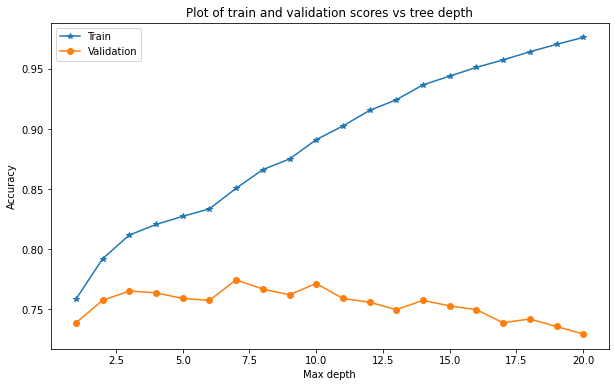

In [9]:
# determine accuracy for decision tree classifier
decision_tree_classifier(features_train, target_train, features_valid, target_valid)

The decision tree classifier can determines the right plan when we run a learning algorithm to train the model to make predictions. We created a loop for `max_depth` hyperparameter from 1 to 20 to see what depth gives us the best fit. We note that shallow decision trees (e.g. few depth) generally do not overfit but have poor performance (high bias, low variance), and deep trees (e.g. high depth) generally do overfit and have good performance (low bias, high variance). Our desirable tree depth is one that is not so shallow that it has low performance and not so deep that it overfits the training dataset. We need to have a balance between bias and variance - bias variance tradeoff. We plot the model accuracy scores on the train and validation sets to visualize this. Notice how the accuracy of the validation test keeps increasing until it gets to `max_depth` of 4. After this depth, the accuracy starts to decline. At `max_depth` of 4, we have an accuracy of 82.05% for the training set, and 76.36% for the validation set. We choose a tree depth of 4 before the model begins to overfit the training dataset. 

##### Logistic Regression Model

In [10]:
# create the logistic regression model
def logistic_regression(X_train, y_train, X_valid, y_valid):
    """
    This is a logistic regression model function developed to train
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets
    """
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(X_train, y_train) # train the model 
    model.score(X_train, y_train) # check the model's accuracy with score() method
    train_predictions = model.predict(X_train) # make predictions on train set
    predictions_valid = model.predict(X_valid) # make predictions on validation set
    print('Accuracy for logistic regression model')
    print('-'*40)
    print('Training set:', accuracy_score(y_train, train_predictions))
    print('Validation set:', accuracy_score(y_valid, predictions_valid))

In [11]:
# determine accuracy for logistic regression model
logistic_regression(features_train, target_train, features_valid, target_valid)

Accuracy for logistic regression model
----------------------------------------
Training set: 0.7028008298755186
Validation set: 0.6998444790046656


Although the model training is fast, the accuracy is lower. The logistic regression model gave an accuracy of 70.28% for the training set, and about 70% for the validation sets. This is lower than our target 75% accuracy. We can see here that neither the training nor the validation score is high. This is because the model is not complex enough hence underfitting occurs. We cannot use this model since both training and validation scores are low.

##### AdaBoostClassifier

In [12]:
def adaboost_classifier(X_train, y_train, X_valid, y_valid):
    """
    This is an Adaboost classifier function developed to train
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets
    """
    model = AdaBoostClassifier(random_state=12345, n_estimators=5)
    model.fit(X_train, y_train) # train the model 
    model.score(X_train, y_train) # check the model's accuracy with score() method
    train_predictions = model.predict(X_train) # make predictions on train set
    predictions_valid = model.predict(X_valid) # make predictions on validation set
    print('Accuracy for Adaboost classifier')
    print('-'*40)
    print('Training set:', accuracy_score(y_train, train_predictions))
    print('Validation set:', accuracy_score(y_valid, predictions_valid))

In [13]:
# determine accuracy for adaboost classifier
adaboost_classifier(features_train, target_train, features_valid, target_valid)

Accuracy for Adaboost classifier
----------------------------------------
Training set: 0.8112033195020747
Validation set: 0.7651632970451011


The AdaBoost classifier gives us an accuracy score similar to the decision tree classifier accuracy score at `max_depth` of 3. Let's try out the Random forest classifier. 

##### Random Forest Classifier

In [14]:
# create the random forest classifier model
def random_forest_classifier(X_train, y_train, X_valid, y_valid):
    """
    This is a random forest classifier function developed to train
    the model, make prediction on train and validation dataset, print
    model accuracy for training and validation datasets and visualize
    model accuracy scores on train and validation sets
    """
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define the n_estimator range
    estimator_depth = [i for i in range(1, 21)]
    # create a loop for n_estimator from 1 to 21
    for estimator in estimator_depth:
        model = RandomForestClassifier(random_state=12345, n_estimators=estimator)
        model.fit(X_train, y_train) # train the model 
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print('n_estimator and accuracy for random forest classifier')
        print('-'*40)
        print("\033[1m" + 'n_estimator = {}'.format(estimator) + "\033[0m")
        print('Training set: {:.3f}'.format(accuracy_score(y_train, train_predictions)))
        print('Validation set: {:.3f}'.format(accuracy_score(y_valid, predictions_valid)))
        print()
    # plot of train and validation scores vs n_estimator
    plt.figure(figsize=(10,6))
    plt.plot(estimator_depth, train_scores, '-*', label='Train')
    plt.plot(estimator_depth, valid_scores, '-o', label='Validation')
    plt.title('Plot of train and validation scores vs n_estimator')
    plt.xlabel('Number of estimators')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 1
Training set: 0.902
Validation set: 0.703

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 2
Training set: 0.910
Validation set: 0.757

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 3
Training set: 0.959
Validation set: 0.745

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 4
Training set: 0.948
Validation set: 0.765

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 5
Training set: 0.971
Validation set: 0.762

n_estimator and accuracy for random forest classifier
----------------------------------------
n_estimator = 6
Training set: 0.965
Validation set: 0.770

n_estimator and accuracy for random forest classifier
----------------------

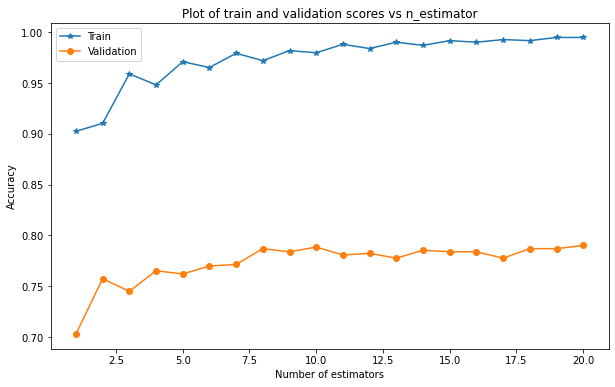

In [15]:
# determine accuracy for random forest classifier
random_forest_classifier(features_train, target_train, features_valid, target_valid)

In tuning hyperparameters for the random forest classifier, we make the `random_state` parameter pseudorandomness static. We also set the number of trees in the forest using `n_estimators` hyperparameter. Using n_estimator value of 10, the random forest classifier gave an accuracy of 98.0% for the training data, and 78.80% for the validation data.

**Conclusion**

From the investigation of different model quality, we can see that at `n_estimators` value of 10, the random forest gives an accuracy of 98.0% for the training data, and 78.80% for the validation data. The logistic regression model was the least accurate model with an accuracy of 70.28% for the training set, and about 69.98% for the validation sets. We proceed to use the random forest classifier to test prediction on the unseen test data.

<div id="check_quality">
    <h2>Check model quality</h2> 
</div>

#### Model testing

The result of the previous section suggested that random forest classifier was perhaps the most accurate model. Using this model as our final model, we can make predictions using the test set.

In [16]:
# Testing the random forest classifier model quality
model = RandomForestClassifier(random_state=12345, n_estimators=10)
model.fit(features_train, target_train) # train the model 
model.score(features_train, target_train) # check the model's accuracy with score() method
test_predictions = model.predict(features_test) # make predictions on test set    

print('Test set:', accuracy_score(target_test, test_predictions))

Test set: 0.7869362363919129


Using the random forest classifier, we tested the model with the test set to obtain an **accuracy score of 79%.**

<div id="sanity_check">
    <h2>Sanity check the model</h2> 
</div>

In this section, we want to get an idea of the accuracy of the model on our validation set. We can fit the model on the training set and make predictions on the validation set, and then evaluate the effectiveness of our algorithm. A better way to judge the effectiveness of the machine learning algorithm is to compute the precision, recall, and F1 score. We would also look at other metrics like balanced accuracy score, ROC score, confusion matrix, and classification report.

##### Confusion Matrix, Precision, Recall, F1-score, Accuracy score, ROC score

In [17]:
# function to compute the precision, recall, and F1 score
def show_sanity_check(X_train, y_train, X_valid, y_valid):
    """
    This function computes the confusion matrix, precision, recall,
    F1-score, accuracy score, balanced accuracy score, ROC score as
    a way to judge the effectiveness of the machine learning algorithm
    """
    model = RandomForestClassifier(random_state=12345)
    model.fit(X_train, y_train)
    predictions_valid = model.predict(X_valid) 
    print("\033[1m" + 'Confusion Matrix' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_valid, predictions_valid))
    print()
    print("\033[1m" + 'Recall: ' + "\033[0m", recall_score(y_valid, predictions_valid))
    print()
    print("\033[1m" + 'Precision: ' + "\033[0m", '{:.3f}'.format(precision_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'F1-score: ' + "\033[0m", '{:.3f}'.format(f1_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'Accuracy Score: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'Balanced Accuracy Score: ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'ROC Score: ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'Classification report' + "\033[0m")
    print('-'*50)
    print(classification_report(y_valid, predictions_valid))
    print()

In [18]:
# display sanity check
show_sanity_check(features_train, target_train, features_valid, target_valid)

Confusion Matrix
--------------------------------------------------
[[401  42]
 [ 90 110]]

Recall:  0.55

Precision:  0.724

F1-score:  0.625

Accuracy Score:  79.47%

Balanced Accuracy Score:  72.76%

ROC Score:  72.76%

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       443
           1       0.72      0.55      0.63       200

    accuracy                           0.79       643
   macro avg       0.77      0.73      0.74       643
weighted avg       0.79      0.79      0.79       643




**Conclusion**

The confusion matrix helps us gain insight into how well our predictions hold up to the actual values and how correct our predictions are. The precision of our model was 0.724, or when it predicts phone plan from subscribers' behavior, it is right 72% of the time. The Recall gives us a measure of how accurate our model is in identifying pattern in data. Clearly the recall is not close to one. We calculated the F1-score as 0.625. Our model accuracy was computed as 79%. Knowing about recall, precision, F1, and the ROC curve allows us to assess classification models and should make us think skeptically about anyone touting only the accuracy of a model, especially for imbalanced problems. As we have seen, accuracy does not provide a useful assessment on several crucial problems, but now we know how to employ smarter metrics!

<div id="overall_conclusion">
    <h2>Overall conclusion</h2> 
</div>

In the first section, we looked at the structure and shape of the data. We observed that there are no duplicated rows, or missing values as expected. From the shape of the data, the data have 5 columns and 3214 rows. We then split the source dataset into a training set, validation set, and test set using a ratio 3:1:1 or 60% training set, 20% validation set, and 20% testing sets. The data after the split now contains 1928 rows for the train sets, 643 rows for the validation sets, and 643 rows for the testing sets. We then proceeded to investigate the quality of different models by changing hyperparameters. We did this for decision tree classifier, random forest classifier, adaboost classifier, and the logistic regression algorithms. The random forest classifier turned out to be the best model for our application.

From the investigation of different model quality, we can see that with an `n_estimators` value of 10, the random forest gives an accuracy of 98.0% for the training data, and 78.80% for the validation data. We choose this hyperparameter because we don't want the model to be too complex that it overfits the data, or to simple that it underfit the data. The `n_estimators` value of 10 gave us a balance between bias and variance - bias variance tradeoff.

The logistic regression model was the least accurate model with an accuracy of 70.28% for the training set, and about 69.98% for the validation sets. We note that the logistic regression underfitted the data significantly. We proceed to use the random forest classifier to test prediction on the unseen test data. Using the random forest classifier, we tested the model with the test set to obtain an accuracy score of 79%. As an additional step to sanity check the model, we computed the precision, F1-score, precision, recall score, balanced accuracy score, ROC score, confusion matrix, and classification report.

At the end of the project, we achieve our objectives of developing a model with the highest possible accuracy. The threshold for accuracy was 75% from the business task. Our model obtained an accuracy of **79%**. The model clearly achieved what the business task required which was to develop a model that will pick the right plan. In order words, if we use the model to predict the right phone plan for subscribers', we would be right 79% of the time.